<a href="https://colab.research.google.com/github/jazaineam1/nopara/blob/main/Cuadernos/Kruskall_Wallis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Test de Kruskal-Wallis y Friedman**

## ***Fundación Universidad de América***
>## **Estadística y Ciencias Actuariales**
>## ***Estadística No Paramétrica***
<img src="https://congresoambiental.car.gov.co/wp-content/uploads/2022/08/uniAmerica.png" alt="Imágen1" width="600" height="200">



El Test de Kruskal-Wallis, conocido también como la prueba H, representa una alternativa no paramétrica al ANOVA tradicional para comparar más de dos grupos cuando los datos no están relacionados. Este método extiende el enfoque del Test de Mann-Whitney para múltiples grupos y se basa en el uso de rangos para evaluar si diversas muestras provienen de una población común.

A diferencia de ANOVA, que compara medias entre los grupos, el Test de Kruskal-Wallis examina si las muestras provienen de una distribución uniforme, lo que implica que comparten una población común. En esencia, aunque con simplificaciones, puede decirse que este test se orienta a comparar medianas entre los grupos. Las hipótesis son:

$$H_0: \text{todas las muestras provienen de la misma población o distribución.$$ En contraste, la hipótesis alternativa} $$ $$H_a: \text{al menos una de las muestras proviene de una distribución distinta}$$.

Este test resulta especialmente útil cuando los datos presentan un orden inherente o cuando no se cumplen los supuestos necesarios para realizar un ANOVA. Por ejemplo, en estudios de diferencias de rendimiento, se puede recurrir a los tiempos totales de los participantes (para ANOVA) o a sus posiciones finales (para el Test de Kruskal-Wallis).

El Test se aplica a k grupos con n observaciones cada uno. Después de ordenar y asignar rangos a todas las observaciones, se espera que, bajo la hipótesis nula, los rangos sumados en cada grupo sean similares. De esta premisa se deriva el estadístico H:

$$H = \frac{12}{N(N+1)} \sum_{i=1}^{k} \frac{R_i^2}{n_i} - 3(N+1) $$

Condiciones para el Test de Kruskal-Wallis:

- No se requiere que las muestras sigan una distribución normal.
- Se espera homocedasticidad, o igualdad de varianzas entre los grupos, suponiendo que todas las muestras vienen de la misma población y comparten medianas similares.
- Los grupos deben tener distribuciones idénticas, aunque no necesariamente normales, como podría ser el caso de todas con sesgo hacia el mismo lado.

El estadístico H se compara según los casos:

- Para k = 3 grupos con no más de 5 observaciones cada uno, se utilizan tablas predefinidas de H.
- Para otros casos, H sigue una distribución χ² con k-1 grados de libertad.

Aunque ANOVA puede ser robusto frente a desviaciones de la normalidad, especialmente con tamaños de muestra medios o grandes, se prefiere el Test de Kruskal-Wallis cuando las muestras son asimétricas, con la misma dirección de sesgo y varianzas homogéneas. Para varianzas heterogéneas, se recomienda un ANOVA ajustado por Welch. El ANOVA no es adecuado para datos puramente ordinales, donde el Test de Kruskal-Wallis es la mejor opción.

## Comparaciones Post-Hoc


Al igual que ocurre con un ANOVA, si el test de Kruskal-Wallis es significativo, implica que al menos dos grupos de entre los comparados son significativamente diferentes, pero no indica cuales. Para saberlo es necesario compararlos todos entre ellos. Esto implica realizar una corrección del nivel de significancia para evitar incrementar el error de tipo I. Los dos métodos de comparación post-hoc más empleados para un test de Kruskal-Wallis son:

Test de Mann-Whitney entre cada par de grupos con corrección de significancia pairwise.wilcox.test().

Tukey’s range test: en R existe la función kruskalmc() del paquete pgirmess.

## Ejemplo
Hollander y Wolfe discuten en su trabajo un pequeño estudio que evaluó la eficiencia mucociliar a partir de la tasa de polvo en tres grupos diferentes: sujetos normales, sujetos con enfermedad obstructiva de las vías aéreas y sujetos con asbestosis. Las respuestas miden los tiempos de limpieza mucociliar de los sujetos, representando el tiempo que tarda en reducirse a la mitad la cantidad de moco. Los tamaños de las muestras son pequeños: n1 = n3 = 5 y n2 = 4, lo que suma un total de n = 14 sujetos. Los datos se presentan en vectores de R denominados normal, obstruct y asbestosis.

In [1]:
normal <- c(3.9,3.0,2.5,2.6,3.2)
obstruct <- c(3.8,2.7,3.0,2.4)
asbestosis <- c(3.8,4.4,4.7,3.2,3.0)
x <- c(normal,obstruct,asbestosis)
g <- c(rep('Normal',5),rep('Obstruct',4),rep('asbestosis',5))


df=data.frame(Tratamiento=g,mucosidad=x)
df

Tratamiento,mucosidad
<chr>,<dbl>
Normal,3.9
Normal,3.0
Normal,2.5
Normal,2.6
Normal,3.2
Obstruct,3.8
Obstruct,2.7
Obstruct,3.0
Obstruct,2.4


In [2]:
aggregate(mucosidad ~ Tratamiento, data = df, FUN = median)

Tratamiento,mucosidad
<chr>,<dbl>
asbestosis,3.80
Normal,3.00
Obstruct,2.85


In [3]:
aggregate(mucosidad ~ Tratamiento, data = df, FUN = sd)

Tratamiento,mucosidad
<chr>,<dbl>
asbestosis,0.7362065
Normal,0.5594640
Obstruct,0.6020797


In [4]:
install.packages(c('ggplot','car'))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘ggplot’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘Rcpp’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’




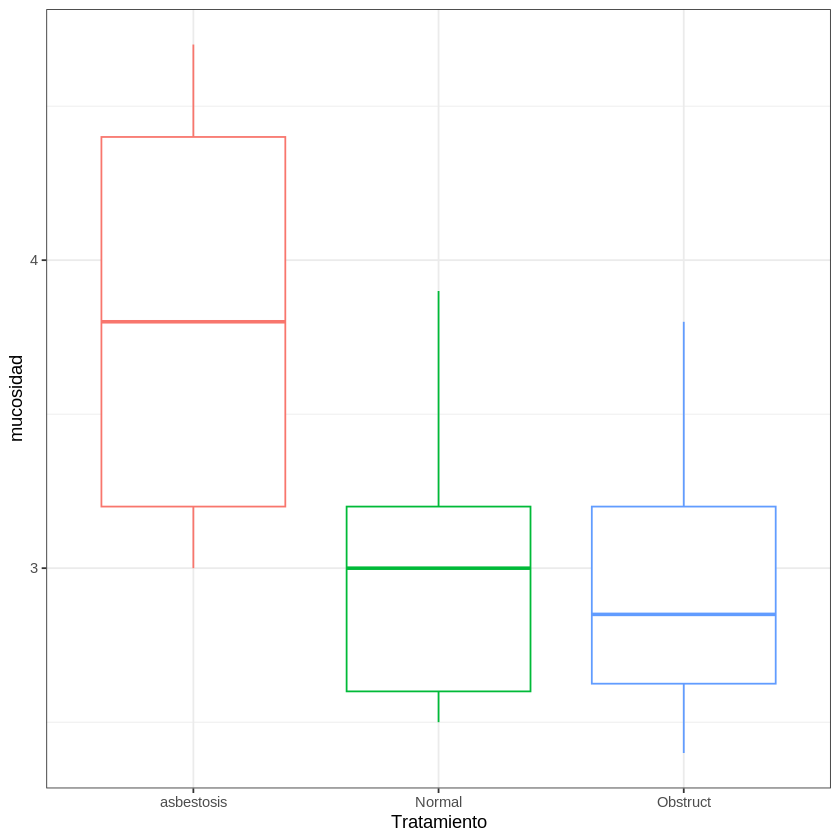

In [5]:
library(ggplot2)

ggplot(data = df, mapping = aes(x = Tratamiento, y = mucosidad, colour = Tratamiento)) +
    geom_boxplot() +
    theme_bw() +
    theme(legend.position = "none")

La representación gráfica de los datos muestra que las muestras no se distribuyen de forma normal, lo que supone una limitación para emplear un test ANOVA.

**Condiciones**

Homocedasticidad: la varianza debe de ser constante entre todos los grupos.

In [6]:
library(car)
leveneTest(mucosidad ~ Tratamiento, data = df, center = "median")

Loading required package: carData

Warning message in leveneTest.default(y = y, group = group, ...):
“group coerced to factor.”


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,2,0.3721504,0.6976062
,11,NA,NA


In [7]:
kruskal.test(mucosidad ~ Tratamiento, data = df)


	Kruskal-Wallis rank sum test

data:  mucosidad by Tratamiento
Kruskal-Wallis chi-squared = 3.8978, df = 2, p-value = 0.1424


El test **no**  encuentra   diferencia   significativa de al menos dos grupos.


## Comparaciones post-hoc para saber que dos grupos difieren

Existen diferentes métodos de corrección del nivel de significancia, entre ellos destacan el de Bonferroni que es muy estricto y el de Holm, este último parece ser más recomendado.

El método de Holm en las pruebas post-hoc de Kruskal-Wallis es una técnica de ajuste para múltiples comparaciones, usada para controlar la tasa de error de Tipo I (la probabilidad de rechazar incorrectamente una hipótesis nula verdadera) cuando se realizan varias pruebas estadísticas simultáneas. Esta situación suele presentarse después de que un test de Kruskal-Wallis indica diferencias significativas entre tres o más grupos, y deseamos determinar entre qué pares de grupos existen esas diferencias.

Cuando aplicamos la corrección de Holm, las hipótesis individuales (por ejemplo, las comparaciones entre pares de grupos) se ordenan de acuerdo a sus niveles de significancia p, de menor a mayor. La corrección de Holm ajusta los valores p comparándolos con un umbral decreciente que depende del rango de la comparación y del número total de comparaciones.

In [8]:
pairwise.wilcox.test(x = df$mucosidad, g = df$Tratamiento, p.adjust.method = "holm" )

Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”



	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  df$mucosidad and df$Tratamiento 

         asbestosis Normal
Normal   0.33       -     
Obstruct 0.33       0.81  

P value adjustment method: holm 

## Cálculo de tamaño del efecto

Finalmente, para aquellas comparaciones que se consideren significativas se tiene que reportar el tamaño del efecto (no existe forma de calcular el tamaño del efecto para el test de Kruskal-Wallis en conjunto). En este caso se han realizado comparaciones con Mann-Whitney-wilcox (ver en capítulo dedicado a este test para saber cómo se calcula).

## Ejercicios
1. Genera tres muestras de tamaño 10 de una distribución exponencial con λ = 0.10. Realiza tanto la prueba F como la prueba de Kruskal-Wallis (KW) para ver si hay diferencias de tratamiento en los tres grupos. Repite esto 1000 veces, registrando el valor-p para ambas pruebas. Compara los resultados de la simulación comparando los dos histogramas hechos a partir de estos valores-p. ¿Qué significan los resultados?

2. Las estadísticas de puntos por partido de la temporada de la NBA de 1993 fueron analizadas para jugadores de baloncesto que asistieron a cuatro escuelas de la ACC en particular: Duke, North Carolina, North Carolina State y Georgia Tech. Queremos averiguar si la puntuación es diferente para los jugadores de diferentes escuelas. ¿Se puede analizar esto con un procedimiento paramétrico? ¿Por qué sí o por qué no? La prueba F clásica que asume la normalidad de las poblaciones arroja un valor de F = 0.41 y no se rechaza H0. ¿Qué pasa con el procedimiento no paramétrico?


| Escuela          | Puntos |
|------------------|--------|
| Duke             | 7.5    |
| Duke             | 8.7    |
| Duke             | 7.1    |
| Duke             | 18.2   |
| Duke             | 12.9   |
| Duke             | 5.9    |
| Duke             | 1.9    |
| Duke             | 15.8   |
| UNC (North Carolina) | 5.5    |
| UNC (North Carolina) | 6.2    |
| UNC (North Carolina) | 13.0   |
| UNC (North Carolina) | 9.7    |
| UNC (North Carolina) | 4.6    |
| UNC (North Carolina) | 18.7   |
| UNC (North Carolina) | 8.7    |
| NCSU (North Carolina State) | 16.9   |
| NCSU (North Carolina State) | 4.5    |
| NCSU (North Carolina State) | 10.5   |
| NCSU (North Carolina State) | 4.4    |
| NCSU (North Carolina State) | 4.0    |
| NCSU (North Carolina State) | 14.0   |
| GT (Georgia Tech) | 7.9    |
| GT (Georgia Tech) | 7.8    |
| GT (Georgia Tech) | 14.5   |
| GT (Georgia Tech) | 6.1    |

## **Test de Friedman**
### Introducción


El test de Friedman es la alternativa no paramétrica a la prueba ANOVA de una vía cuando los datos son dependientes (pareados). Se trata de una extensión de la prueba de los rangos con signo de Wilcoxon para más de dos grupos (basada en suma de rangos). Asumiendo ciertas simplificaciones, puede considerarse como una comparación entre las medianas de varios grupos.

El test de Friedman es el test adecuado cuando los datos tienen un orden natural, (cuando para darles sentido tienen que estar ordenados) y además son pareados. Por ejemplo, si se quiere estudiar la diferencia en el rendimiento de un grupo de corredores dependiendo de la estación del año, se hace correr al mismo grupo de personas una vez en cada estación. Como resultado, se puede disponer de dos tipos de datos: los tiempos de cada participante (análisis con ANOVA pareado) o las posiciones en las que han terminado la carrera cada participante en cada una de las carreras (análisis con Friedman test).

EL concepto es similar a la suma de rangos de Wilcoxon para dos grupos pero esta vez asignando los rangos dentro de cada fila (ya que hay más de dos medidas para cada individuo) y después haciendo la suma de rangos para cada columna.

El test de Friedman genera un estadístico conocido como Fr o Q que se distribuye:

- Si el número total de individuos (N
) es mayor de 10, la distribución de Fr se aproxima a una distribución χ2
 con k−1
 grados de libertad (siendo k
 el número de grupos a comparar).

- Si el número de individuos es menor de 10, se recurre a tablas con los valores de significancia para un test de Friedman.

### Comparaciones Post-Hoc


Al igual que ocurre con un ANOVA, si el test de Friedman es significativo implica que, al menos dos grupos de entre los comparados, son significativamente diferentes, pero no indica cuales. Para saberlo es necesario compararlos todos entre ellos. Esto implica realizar una corrección del nivel de significancia para evitar incrementar el error de tipo I. Los dos métodos de comparación post-hoc más empleados para un test de Friedman son:

- Test de rangos con signo de Wilcoxon entre cada par de grupos con corrección de significancia ```pairwise.wilcox.test( paried = TRUE )```.

Tukey’s range test: en R existe la función ```friedmanmc()``` del paquete pgirmess.

### Ejemplo


Un estudio pretende determinar si existe diferencia en como de bueno consideran los consumidores que es un vino dependiendo de la hora del día en la que lo toman. Para ello se selecciona a un grupo de 7 sujetos a los que se les da a probar un vino por la mañana, por la tarde y por la noche. En cada degustación se valora del 1 al 11 el vino (los degustadores no saben que es el mismo vino).



In [9]:
valoracion <- c( 9, 5, 2, 6, 3, 1, 5, 5, 5, 11, 5, 1, 8, 4, 3, 10, 4, 1, 7, 3, 4 )
hora <- factor( rep( c( "mañana", "tarde", "noche" ), 7 ) )
sujeto <- factor( rep( 1:7, each = 3 ) )
datos <- data.frame( valoracion, hora, sujeto )
datos

valoracion,hora,sujeto
<dbl>,<fct>,<fct>
9,mañana,1
5,tarde,1
2,noche,1
6,mañana,2
3,tarde,2
1,noche,2
5,mañana,3
5,tarde,3
5,noche,3


In [10]:
by(data = datos$valoracion, INDICES = datos$hora, FUN = median)

datos$hora: mañana
[1] 8
------------------------------------------------------------ 
datos$hora: noche
[1] 2
------------------------------------------------------------ 
datos$hora: tarde
[1] 4

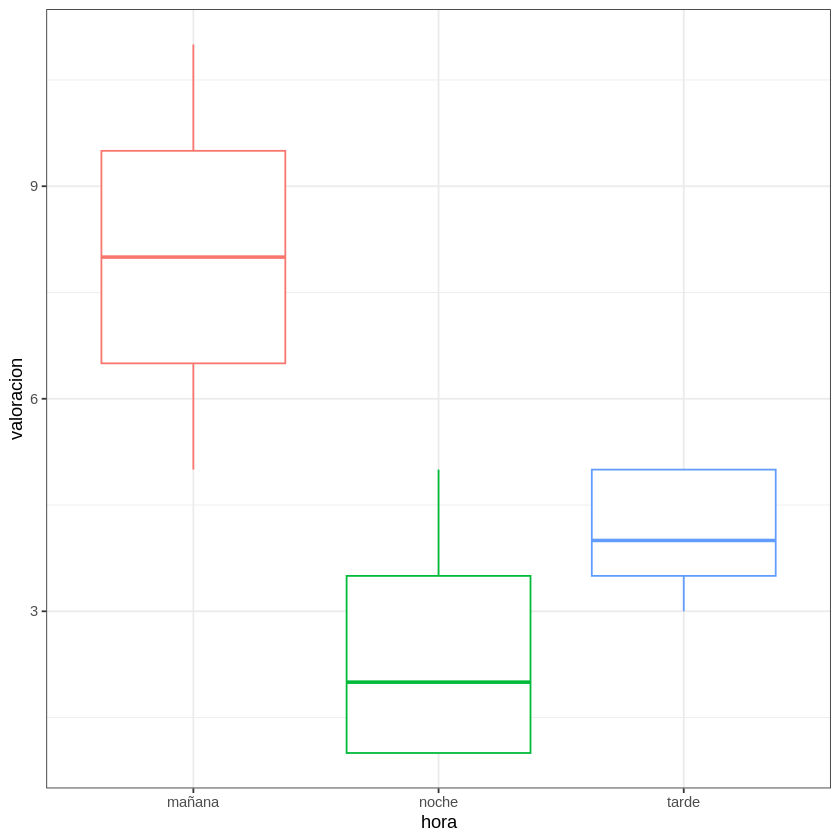

In [11]:
library(ggplot2)
ggplot(data = datos, mapping = aes(x = hora, y = valoracion, colour = hora)) +
    geom_boxplot() +
    theme_bw() +
    theme(legend.position = "none")

El box-plot parece indicar que sí hay diferencia dependiendo de la hora del día. Al tratarse de escalas de valoración (valores ordinales) no se puede emplear un ANOVA, se emplea el test de Friedman.


### Test de Friedman



In [12]:
friedman.test(valoracion, hora, sujeto)


	Friedman rank sum test

data:  valoracion, hora and sujeto
Friedman chi-squared = 10.333, df = 2, p-value = 0.005704


El test encuentra diferencias significativas entre al menos dos grupos. Para saber cuáles son, se realizan comparaciones dos a dos empleando el test de Wilcoxon rangos con signo.


Comparaciones múltiples



In [13]:
pairwise.wilcox.test(datos$valoracion, datos$hora, paired = TRUE, p.adjust.method = "holm")

Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with zeroes”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with zeroes”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with zeroes”



	Pairwise comparisons using Wilcoxon signed rank test with continuity correction 

data:  datos$valoracion and datos$hora 

      mañana noche
noche 0.1    -    
tarde 0.1    0.1  

P value adjustment method: holm 

A pesar de que el test de Friedman resulta significativo, las comparaciones por pares mediante wilcox test con corrección de holm no encuentran ninguna diferencia significativa.

## Taller

**1.** Utiliza el test de Kolmogorov-Smirnov para examinar, bajo un nivel de significancia de 0.01, si las observaciones en la Tabla 9.35 son números aleatorios distribuidos uniformemente entre 0 y 1.

0.385, 0.855, 0.309, 0.597, 0.713, 0.660, 0.137, 0.396, 0.238, 0.657, 0.583, 0.194

**2.** Cada persona en una muestra aleatoria de n = 10 empleados fue preguntada acerca de X, el tiempo diario perdido en el trabajo realizando actividades no laborales, como navegar por internet y enviar correos electrónicos a amigos. Los datos resultantes, en minutos, son los siguientes:

108, 112, 117, 130, 111, 131, 113, 113, 105, 128

¿Es correcto asumir que estos datos provienen de una distribución normal con una media de 120 y una desviación estándar de 10?

**3.** Determinar si las muestras de Italia y Francia provienen de la misma distribución, considera los siguientes datos:

Italia | Francia
-------|--------
3      | 2
2      | 8
3      | 2
5      | 4
8      | 4
9      | 3
8      | 6
8      |



**4.** Se lleva a cabo un estudio para evaluar la efectividad de un programa de ejercicio en la reducción de la presión arterial sistólica en pacientes con prehipertensión (definida como una presión arterial sistólica entre 120-139 mmHg o una presión arterial diastólica entre 80-89 mmHg). Un total de 15 pacientes con prehipertensión se inscriben en el estudio y se mide su presión arterial sistólica. Luego, cada paciente participa en un programa de entrenamiento de ejercicio donde aprenden técnicas adecuadas y ejecución de una serie de ejercicios. Se les instruye a los pacientes que realicen el programa de ejercicios 3 veces por semana durante 6 semanas. Después de 6 semanas, se vuelven a medir las presiones arteriales sistólicas. Los datos se muestran a continuación:

| Paciente | Presión Arterial Sistólica Antes del Programa de Ejercicio | Presión Arterial Sistólica Después del Programa de Ejercicio |
|----------|------------------------------------------------------------|-------------------------------------------------------------|
| 1        | 125                                                        | 118                                                         |
| 2        | 132                                                        | 134                                                         |
| 3        | 138                                                        | 130                                                         |
| 4        | 120                                                        | 124                                                         |
| 5        | 125                                                        | 105                                                         |
| 6        | 127                                                        | 130                                                         |
| 7        | 136                                                        | 130                                                         |
| 8        | 139                                                        | 132                                                         |
| 9        | 131                                                        | 123                                                         |
| 10       | 132                                                        | 128                                                         |
| 11       | 135                                                        | 126                                                         |
| 12       | 136                                                        | 140                                                         |
| 13       | 128                                                        | 135                                                         |
| 14       | 127                                                        | 126                                                         |
| 15       | 130                                                        | 132                                                         |

Estos datos representan las mediciones de presión arterial sistólica antes y después del programa de ejercicio para los 15 pacientes incluidos en el estudio.

¿Hay alguna diferencia en las presiones arteriales sistólicas después de participar en el programa de ejercicio en comparación con antes?

**5.** Utilice el Test de signo para el siguiente ejercicio. Un total de 8 niños con autismo se inscriben en el estudio y se mide la cantidad de tiempo que cada niño pasa involucrado en comportamientos repetitivos durante períodos de observación de tres horas, tanto antes del tratamiento como después de tomar la nueva medicación durante un período de 1 semana. Los datos se muestran a continuación:

| Niño | Antes del Tratamiento | Después de 1 Semana de Tratamiento |
|------|------------------------|------------------------------------|
| 1    | 85                     | 75                                 |
| 2    | 70                     | 50                                 |
| 3    | 40                     | 50                                 |
| 4    | 65                     | 40                                 |
| 5    | 80                     | 20                                 |
| 6    | 75                     | 65                                 |
| 7    | 55                     | 40                                 |
| 8    | 20                     | 25                                 |

Estos datos representan la cantidad de tiempo en minutos que cada niño pasó involucrado en comportamientos repetitivos antes y después del tratamiento. ¿hay alguna diferencia significativa en los comportamientos repetitivos antes y después del tratamiento?

**6-** Realice el ejercicio anterior usando el test de Wilcoxon

**7.** Se desea construir una prueba de psicomotricidad en la que no presenten
significativas las personas ciegas de nacimientos con respecto a las videntes.
Se toman al azar 5 ciegos de nacimiento y 6 videntes, todos de la misma edad,mismo sexo y educación similar. Los datos obtenidos en la prueba fueron:

Ciegos: 16, 19,18,20,23
Videntes: 20, 17, 25,24,27,29
¿Hay evidencia suficiente para firmar que ambos grupos son iguales en la prueba?

**8.** En un estudio de toxicología, con el objetivo de verificar el contenido de alquitrán, se prueban cuatro muestras aleatorias de cigarrillos. Utilizando un nivel de significancia de α = 0.05, se desea probar que no hay diferencias entre las cuatro poblaciones de marcas de cigarrillos. A continuación se presenta una tabla con los datos de contenido de alquitrán (en ppm) para cada marca de cigarrillos:

| Marca A | Marca B | Marca C | Marca D |
|---------|---------|---------|---------|
| 14      | 18      | 17      | 20      |
| 18      | 25      | 14      | 28      |
| 19      | 18      | 14      | 28      |
| 14      | 24      | 16      | 21      |

Estos datos representan los niveles de contenido de alquitrán en partes por millón (ppm) para las cuatro marcas de cigarrillos. El objetivo es determinar si hay alguna diferencia significativa en el contenido de alquitrán entre las diferentes marcas de cigarrillos. (Realice la prueba no paramétrica)

**9.** Se presenta a continuación una tabla con las duraciones de las baterías (en horas) para cuatro marcas distintas:

| Marca A | Marca B | Marca C | Marca D |
|---------|---------|---------|---------|
| 15      | 15.4    | 14.6    | 15.6    |
| 18      | 16.5    | 17.9    | 15.8    |
| 17      | 18.6    | 16.4    | 17.9    |
| 16      | 17.9    | 15.6    | 18.4    |
| 15      | 18      | 14.6    | 16.9    |
| 19      | 16.4    | 16.4    | 15.4    |
| 17.5    | 16.8    | 17.8    |         |
| 17.6    | 18.9    |         |         |

Se desea determinar si existen evidencias suficientes para afirmar con certeza que las duraciones de las baterías de las marcas son diferentes, utilizando un nivel de significancia del 0.05.

**10.** Los científicos Hall, Culp, Hayakawa, Ratliff y Hightower llevaron a cabo un estudio comparativo de tres métodos para determinar los niveles de amilasa sérica en pacientes con pancreatitis. En la siguiente tabla se presentan los valores de amilasa sérica (en unidades de enzimas por 100 ml de suero) para dichos pacientes:

| Muestra | Método A | Método B | Método C |
|---------|----------|----------|----------|
| 1       | 4000     | 3210     | 6120     |
| 2       | 1600     | 1040     | 2410     |
| 3       | 1600     | 647      | 2210     |
| 4       | 1200     | 570      | 2060     |
| 5       | 840      | 445      | 1400     |
| 6       | 352      | 156      | 249      |
| 7       | 224      | 155      | 224      |
| 8       | 200      | 99       | 208      |
| 9       | 184      | 70       | 227      |

Realice una prueba de Friedman con un nivel de significancia del 5 % para determinar si existe alguna diferencia significativa entre los tres métodos de medición de amilasa sérica en pacientes con pancreatitis.

Realice la prueba post hoc adecuada e interprete los resultados.


**Referencia:**

Joaquín A.R.*Prueba de Kruskal-Wallis y pruebas post-hoc en R*. Recuperado de https://rpubs.com/Joaquin_AR/219504

Joaquín A.R.*Test de Friedman*. Recuperado de
https://cienciadedatos.net/documentos/21_friedman_test
